# Análise das Características do Solo ideiais para cada Cultura

## Projeto da disciplina SME0860 - Aprendizado de Máquina Aplicado a Problemas

### Membros

* Alexandre E. de Souza Jesus - alexandre_souza@usp.br - **12559506**

* Eduardo Zaffari Monteiro - eduardozaffarimonteiro@usp.br - **12559490**

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - **12559472**

# 1. Introdução

O uso do solo de maneira adequada é de fundamental importância para maximizar o retorno do plantio e mantê-lo em boas condições para que possa ser utilizado por vários anos sem degradação. Caso o solo seja mal manejado, pode-se acabar com um terreno infértil, o que aumenta a demanda de recursos para o cultivo e recuperação da área de plantio.

Conforme o solo é utilizado para o plantio de um tipo de alimento, ocorre a diminuição dos tipos de nutrientes consumidos por essa planta, e em contrapartida os outros se tornam abundantes pelo acúmulo durante o tempo em que não foi consumido. Dessa forma, pode-se realizar a rotação de culturas, que consiste em plantar alimentos que consomem nutrientes diferentes de maneira cíclica, fazendo com que o solo se mantenha mais bem preservado.

Com objetivo de facilitar a escolha da cultura a ser semeada em um terreno específico será feito o treinamento de um modelo de aprendizado supervisionado. Para isso, serão utilizados dados que consistem em características do terreno, principalmente relacionadas à quantidade de nutrientes e substâncias nele presentes. A classificação dar-se-á de acordo com um tipo de cultura que é considerado ideal para o solo observado.

A tabela de dados apresenta 2200 diferentes condições de solo e suas respectivas culturas ideais, as quais são divididas em 22 classes que indicam diferentes sementes e frutas. Para cada um desses terrenos existem valores de quantidade de nitrogênio, fósforo, potássio, além de temperatura, umidade e pH, além da precipitação plantação recebe durante o crescimento.

# 2. Metodologia

O projeto está sendo realizado e versionado remotamente através da plataforma Github. Seu acesso é possível por meio do link https://github.com/ale-souza/crop-recommendation

## 2.1. Origem dos Dados
Os dados foram obtidos diretamente da plataforma kaggle, um site para estudo de ciência de dados e machine learning, e podem ser obtidos através do link https://www.kaggle.com/datasets/aksahaha/crop-recommendation. Segundo o usuário Abhishek Kumar, que disponibilizou os dados, eles são provenientes do ICAR (Indian Council of Agriculture Research), e complementados por pesquisas na internet feitas por ele.

## 2.2 Dicionário de Dados
* **Nitrogênio (nitrogen)**: Representa a quantidade de nitrogênio (em kg/ha) presente no solo para a cultura. O nitrogênio é um nutriente essencial para o crescimento de plantas, e sua deficiência ou excesso pode afetar o crescimento e a produção da cultura;

* **Fósforo (phosphorus)**: Representa a quantidade de fósforo (em kg/ha) presente no solo para a cultura. Também é um elemento essencial no plantio, sendo importante para processos como transferência de energia e fotossíntese;

* **Potássio (potassium)**: Representa a quantidade de potássio (em kg/ha) presente no solo para a cultura. Também é um elemento essencial, e é importante para processos fisiológicos como regulação de água e transporte de nutrientes;

* **Temperatura (temperature)**: Representa a temperatura média (em Celsius) durante o período de crescimento da cultura. A temperatura é um fator ambiental importante que pode afetar o crescimento e o desenvolvimento das plantas, e cada cultura possui uma temperatura ideal;

* **Umidade (humidity)**: Representa a humidade relativa (em porcentagem) durante o período de crescimento da cultura. A humidade é outro fator ambiental importante, tendo em vista que uma alta humidade pode promover a proliferação de fungos e desenvolvimento de doenças;

* **pH**: Representa o pH da cultura durante seu período de crescimento. O pH é uma medida de acidez ou alcalinidade do solo e pode afetar a disponibilidade de nutrientes para a cultura;

* **Precipitação (rainfall)**: Representa a precipitação (em mm) durante o período de crescimento da cultura. Cada cultura necessita de uma quantidade diferente de água, o que torna a precipitação outro fator ambiental importante;

* **Crop (label)**: Representa o tipo da cultura.

# 3. Coleta dos Dados

In [101]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Modelos de aprendizado supervisionado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelos de aprendizado não-supervisionado
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan

# Normalização dos dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Validação e Particionamento dos dados
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, GridSearchCV, StratifiedShuffleSplit, train_test_split

# Métricas de Avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [36]:
# Leitura dos dados do problema
df = pd.read_csv("https://raw.githubusercontent.com/ale-souza/crop-recommendation/main/Crop_recommendation.csv")

df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [37]:
# Limpando conjunto de dados
df = df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)
df = df.rename(columns={"label": "crop"})
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [38]:
# Verificando as categorias de plantação
labels = df['crop'].astype('category').values
labels = list(labels.categories)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [39]:
# Discretizando categorias de plantação
df["crop_int"] = pd.Categorical(df["crop"]).codes
df["crop_int"]

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: crop_int, Length: 2200, dtype: int8

# 4. Análise Exploratória dos Dados

## 4.1. Medidas Descritivas

In [40]:
# Função para calcular o coeficiente de variância (CV)
def coeficiente_variancia(table):
    return 100 * table.std() / table.mean()

# Função para calcular a amplitude
def amplitude(table):
    return table.max() - table.min()

# Aplicando medidas de posição e dispersão aos atributos preditivos
medidas_descritivas = df.drop(["crop"], axis=1).agg(["min", "max", "mean", "median",
                                                     "var", "std",
                                                     coeficiente_variancia, amplitude])

In [41]:
# Renomeando das medidas descritivas
novos_nomes = {
    "min":"Minimo",
    "max": "Maximo",
    "mean":"Media",
    "median": "Mediana",
    "var": "Variancia",
    "std": "Desvio-padrao",
    "coeficiente_variancia":"Coeficiente de Variancia",
    "amplitude": "Amplitude"
}

medidas_descritivas = medidas_descritivas.rename(novos_nomes)

# Arredondando casas decimais das medidas descritivas e de dispersão
medidas_descritivas = medidas_descritivas.round(3)

In [42]:
medidas_descritivas

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop_int
Minimo,0.000,5.000,5.000,8.826,14.258,3.505,20.211,0.000
Maximo,140.000,145.000,205.000,43.675,99.982,9.935,298.560,21.000
Media,50.552,53.363,48.149,25.616,71.482,6.469,103.464,10.500
Mediana,37.000,51.000,32.000,25.599,80.473,6.425,94.868,10.500
Variancia,1362.890,1088.068,2565.213,25.642,495.677,0.599,3020.424,40.268
Desvio-padrao,36.917,32.986,50.648,5.064,22.264,0.774,54.958,6.346
Coeficiente de Variancia,73.029,61.814,105.190,19.768,31.146,11.963,53.119,60.436
Amplitude,140.000,140.000,200.000,34.850,85.724,6.430,278.349,21.000


A partir das medidas descritivas, pode-se ter uma ideia inicial das distribuições das características. É possível inferir que as variáveis *temperature* e *pH* possuem uma curva simétrica, já que suas médias e medianas são bem próximas, enquanto *humidity* provavelmente possui uma curva assimétrica à esquerda. Para todos os outros atributos as curvas são possivelmente assimétricas à direita.

No que tange as medidas de dispersão, a análise anterior é reforçada. As medidas de variância e desvio-padrão apresentam valores altos para as variáveis que não são simétricas, o que indica que há uma alta variabilidade nos dados. Ou seja, há valores que possuem uma grande distância da média.


## 4.2. Visualização dos Dados

### 4.2.1. Histogramas

Abaixo, é possível observar o formato da curva dos atributos. Assim, há ainda mais evidências de que a análise anteriormente feita está, provavelmente, correta. Fazem-se necessários, então, testes de hipóteses.

<AxesSubplot: xlabel='Nitrogen', ylabel='Count'>

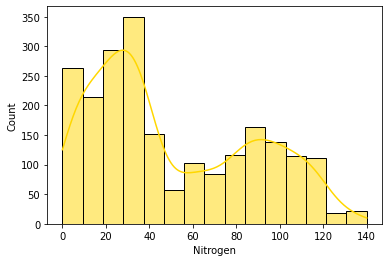

In [43]:
# Nitrogen
sns.histplot(data=df, x="Nitrogen", kde=True, color="gold")

<AxesSubplot: xlabel='phosphorus', ylabel='Count'>

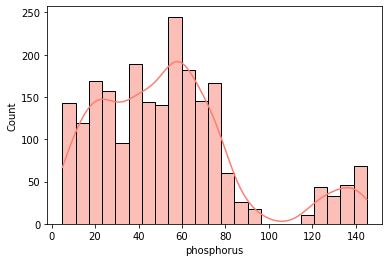

In [44]:
# Phosphorus
sns.histplot(data=df, x="phosphorus", kde=True, color="salmon")

<AxesSubplot: xlabel='potassium', ylabel='Count'>

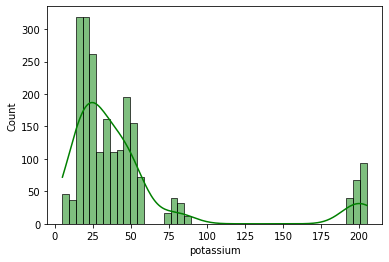

In [45]:
# Potassium
sns.histplot(data=df, x="potassium", kde=True, color="green")

<AxesSubplot: xlabel='temperature', ylabel='Count'>

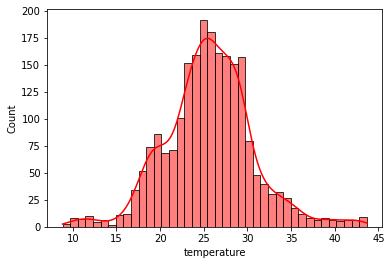

In [46]:
# temperature
sns.histplot(data=df, x="temperature", kde=True, color="red")

Percebe-se, como anteriormente dito, que a distribuição dos dados referentes à variável temperatura provavelmente segue uma distribuição.

<AxesSubplot: xlabel='humidity', ylabel='Count'>

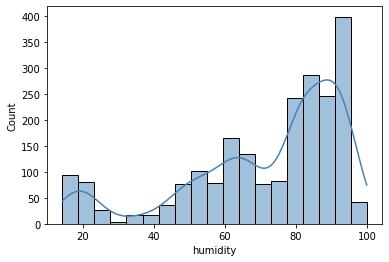

In [47]:
# Humidity
sns.histplot(data=df, x="humidity", kde=True, color="steelblue")

<AxesSubplot: xlabel='ph', ylabel='Count'>

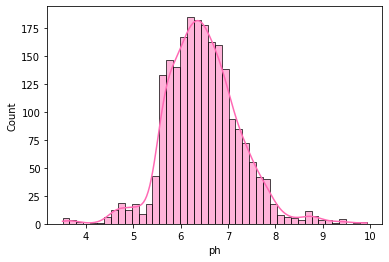

In [48]:
# ph
sns.histplot(data=df, x="ph", kde=True, color="hotpink")

Percebe-se, como anteriormente dito, que a distribuição dos dados referentes à variável pH provavelmente segue uma distribuição.

<AxesSubplot: xlabel='rainfall', ylabel='Count'>

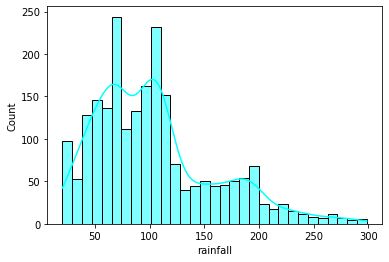

In [49]:
## Rainfall
sns.histplot(data=df, x="rainfall", kde=True, color="aqua")

### 4.2.2. Boxplots

Com os *boxplots*, é possível comparar a distribuição dos dados em relação ao atributo-alvo. Mais uma vez, a teoria de que as variáveis *pH* e *temperature* são mais balanceadas é corroborada.

<AxesSubplot: xlabel='Nitrogen', ylabel='crop'>

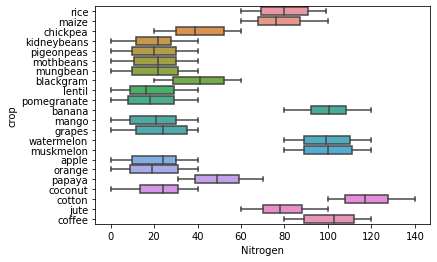

In [50]:
# --------------------
#   Nitrogen x Crop
# --------------------

sns.boxplot(x=df["Nitrogen"], y=df["crop"])

<AxesSubplot: xlabel='phosphorus', ylabel='crop'>

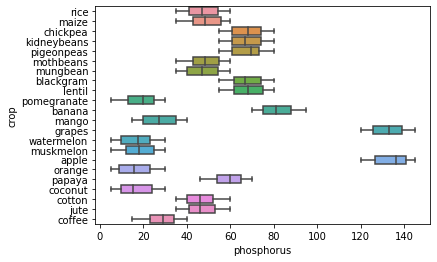

In [51]:
# ----------------------
#   Phosphorus x Crop
# ----------------------

sns.boxplot(x=df["phosphorus"], y=df["crop"])

<AxesSubplot: xlabel='potassium', ylabel='crop'>

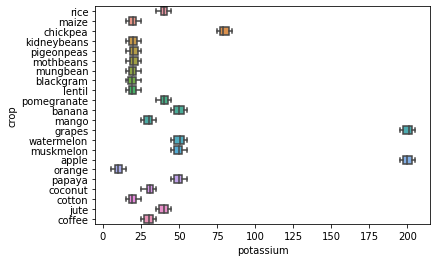

In [52]:
# ---------------------
#   Potassium x Crop
# ---------------------

sns.boxplot(x=df["potassium"], y=df["crop"])

<AxesSubplot: xlabel='temperature', ylabel='crop'>

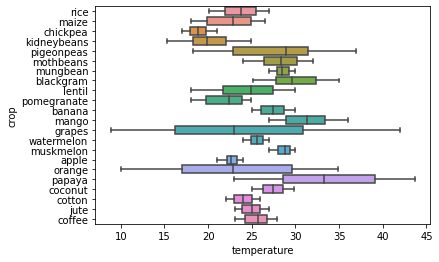

In [53]:
# ----------------------
#   Temperature x Crop
# ----------------------

sns.boxplot(x=df["temperature"], y=df["crop"])

A maior parte dos valores está ao redor da média, que é de aproximadamente 25. Apesar de certos valores apresentarem grande variação, como *grapes* e *orange*, isso não afetou a curva.

<AxesSubplot: xlabel='humidity', ylabel='crop'>

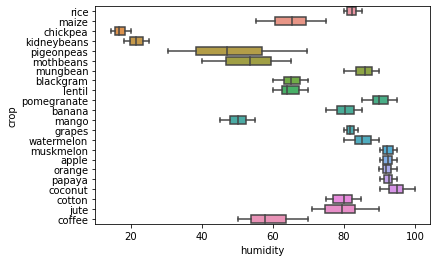

In [54]:
# --------------------
#   Humidity x Crop
# --------------------

sns.boxplot(x=df["humidity"], y=df["crop"])

<AxesSubplot: xlabel='ph', ylabel='crop'>

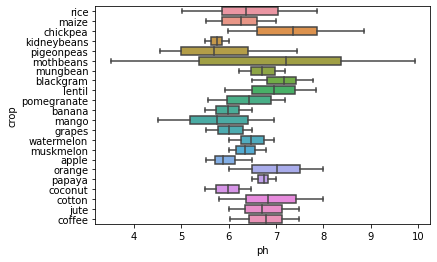

In [55]:
# --------------
#   ph x Crop
# --------------

sns.boxplot(x=df["ph"], y=df["crop"])

O padrão se repete com o atributo *pH*. A maior parte dos valores está concentrada ao redor da média. Neste caso, tal resultado é previsível, visto que essa medida varia entre 0 e 14, e 7 representa um meio neutro (a média dos valores foi de aproximadamente 6,4)

<AxesSubplot: xlabel='rainfall', ylabel='crop'>

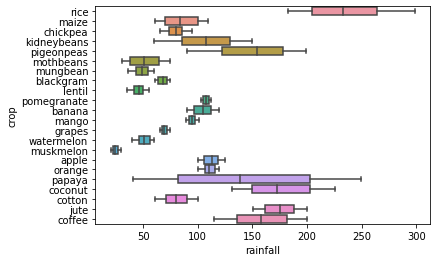

In [56]:
# --------------------
#   Rainfall x Crop
# --------------------

sns.boxplot(x=df["rainfall"], y=df["crop"])

É possível perceber, então, que há certa separação no que tange aos atributos para cada tipo de cultura. Há indícios, portanto, de que é possível classificar o rótulo de novas observações a partir deste conjunto de variáveis.

### 4.2.3. Balaceamento dos Dados

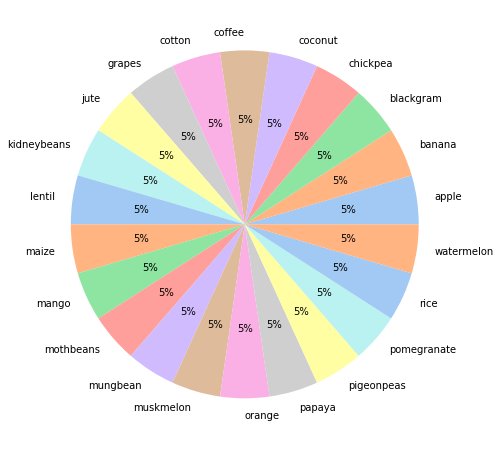

In [57]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')

plt.pie(df['crop'].groupby(df['crop']).count(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

É possível perceber que a distribuição dos valores é idêntica.

## 4.3. Correlação entre as Variáveis

<AxesSubplot: >

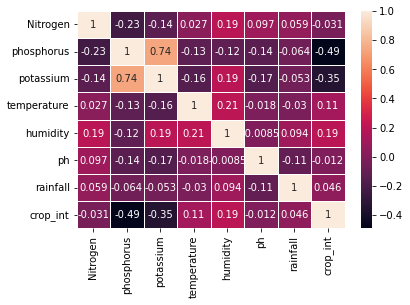

In [58]:
# Mapa de calor com as correlações entre os atributos
sns.heatmap(df.drop(columns=["crop"]).corr(), annot=True, linewidths=0.5)

A maior parte das variáveis **não** está relacionada entre si, com exceção dos atributos *potassium* e *phosphorus*, que possuem uma correlação positiva considerável. Para que a classificação dos dados seja mais efetiva, um dos atributos pode ser removido. Abaixo é possível visualizar a **matriz de dispersão** entre todos as culturas possíveis (os rótulos) e os atributos, o que é necessário para avaliar qual das duas variáveis relacionadas poderia ser removida.

<AxesSubplot: >

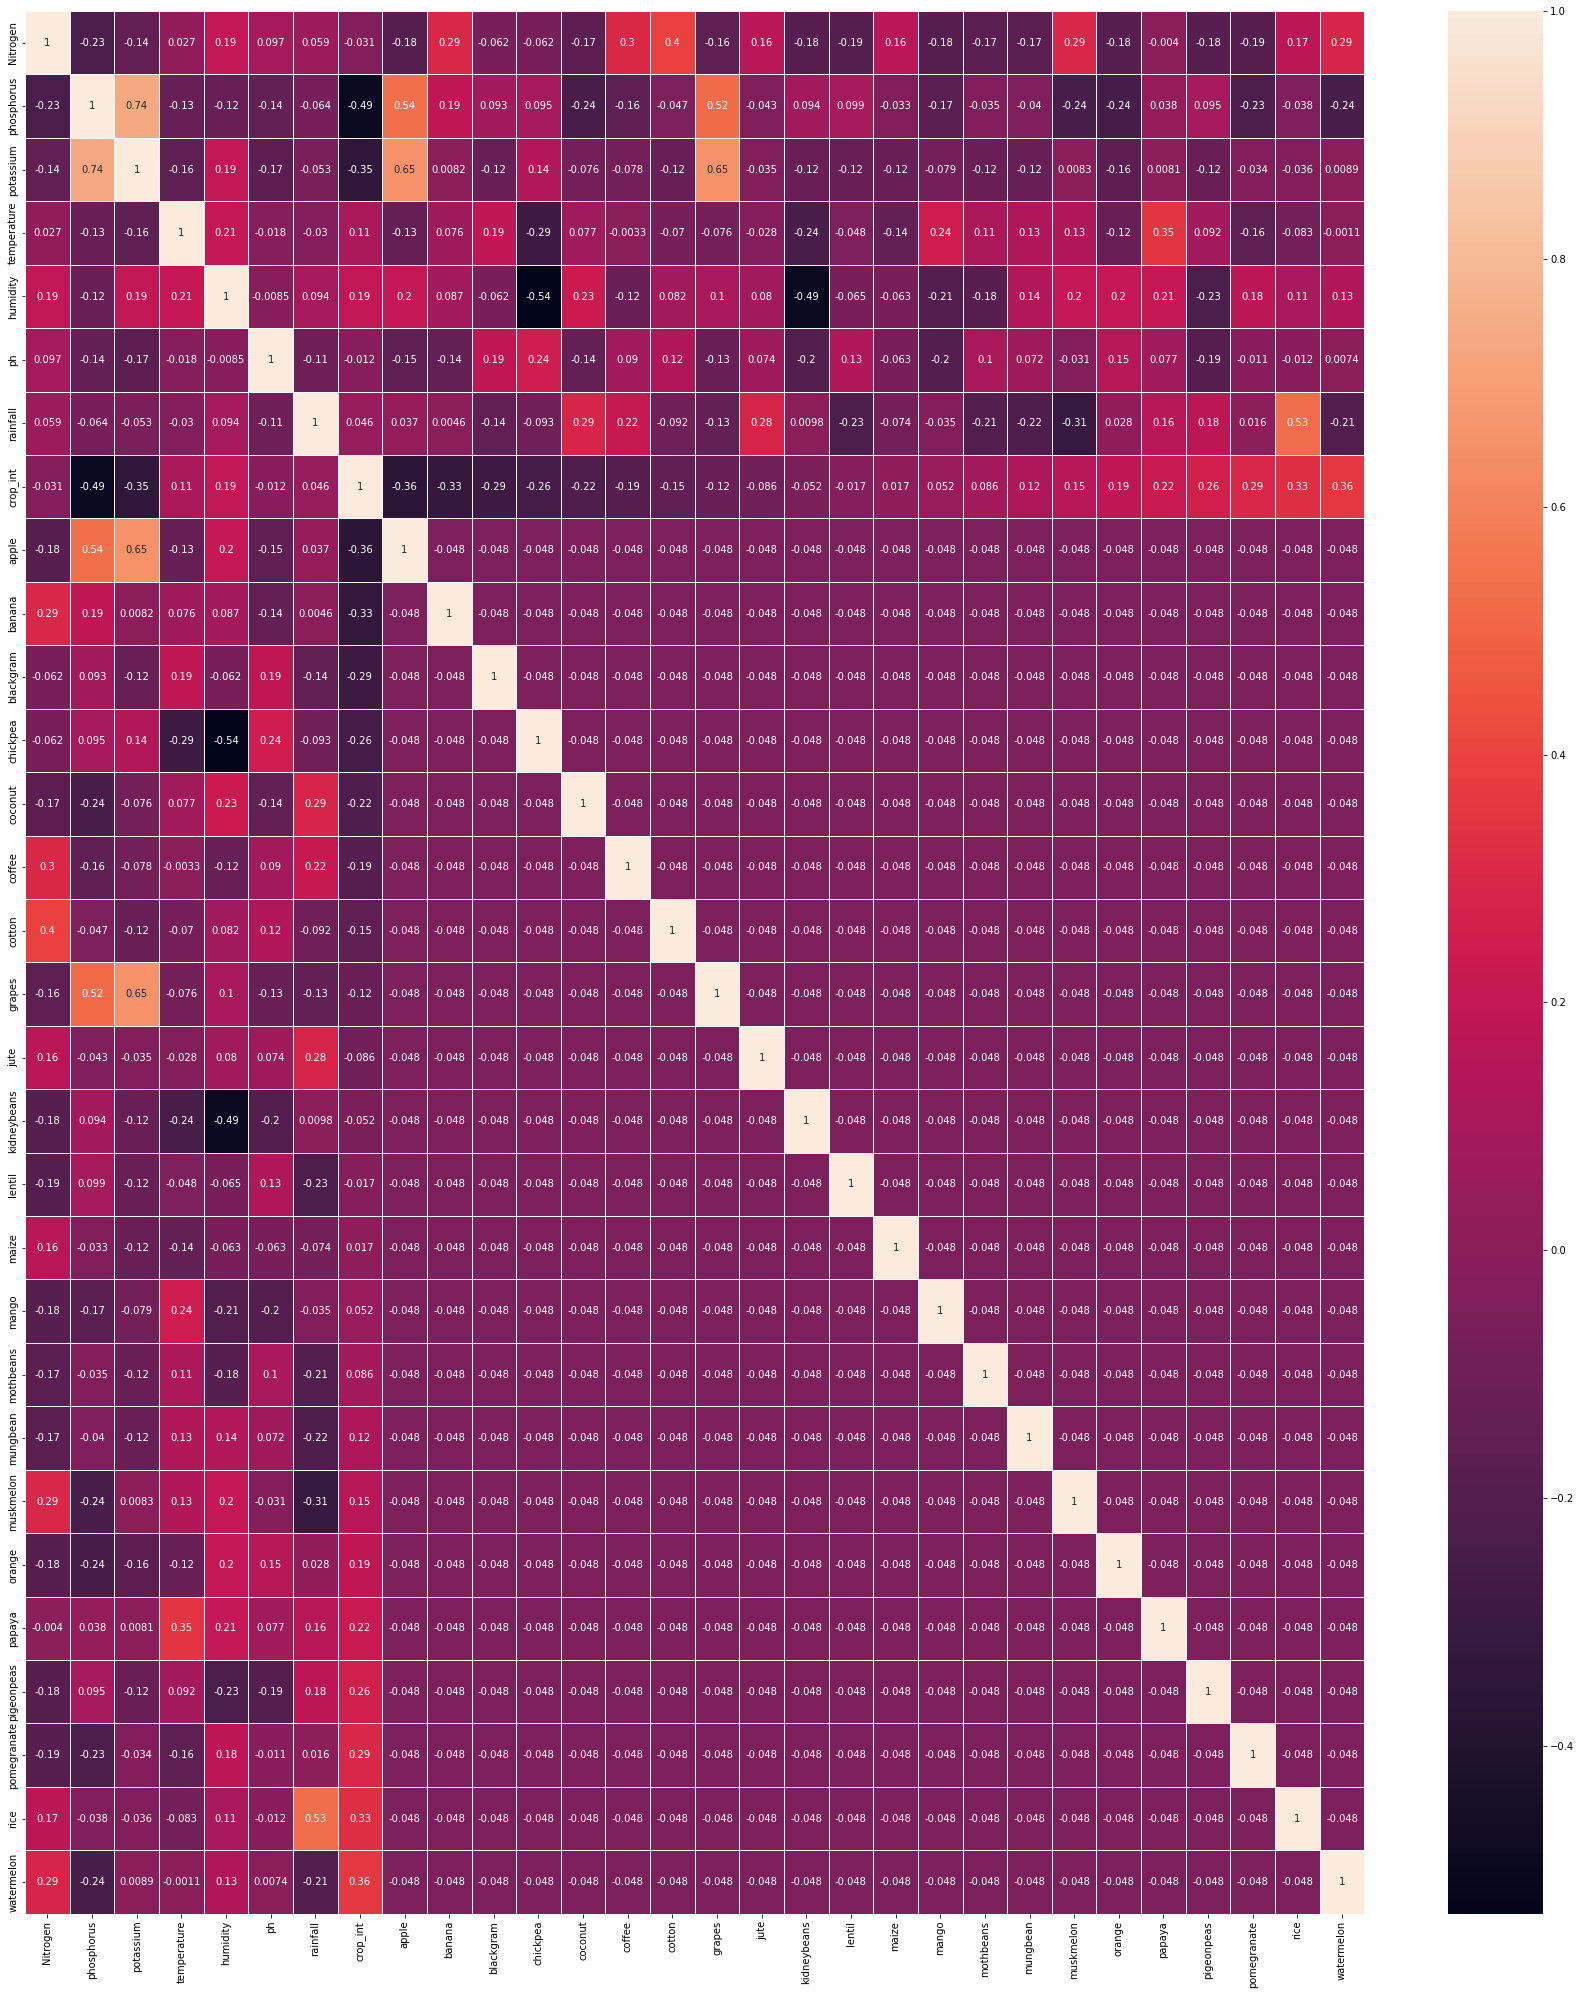

In [59]:
dummies = pd.get_dummies(df['crop'])
dummy_df = pd.concat([df, dummies], axis=1)

plt.figure(figsize=(30, 35))
corr = dummy_df.drop(columns=["crop"]).corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

É possível perceber que dentre elas a que possui maior relação com os atributos-alvo é a *potassium*. Sendo assim, uma possível saída para o problema seria remover a variável *phosporus* do conjunto de dados, visto que *potassium* tem maior relação com o atributo-alvo.

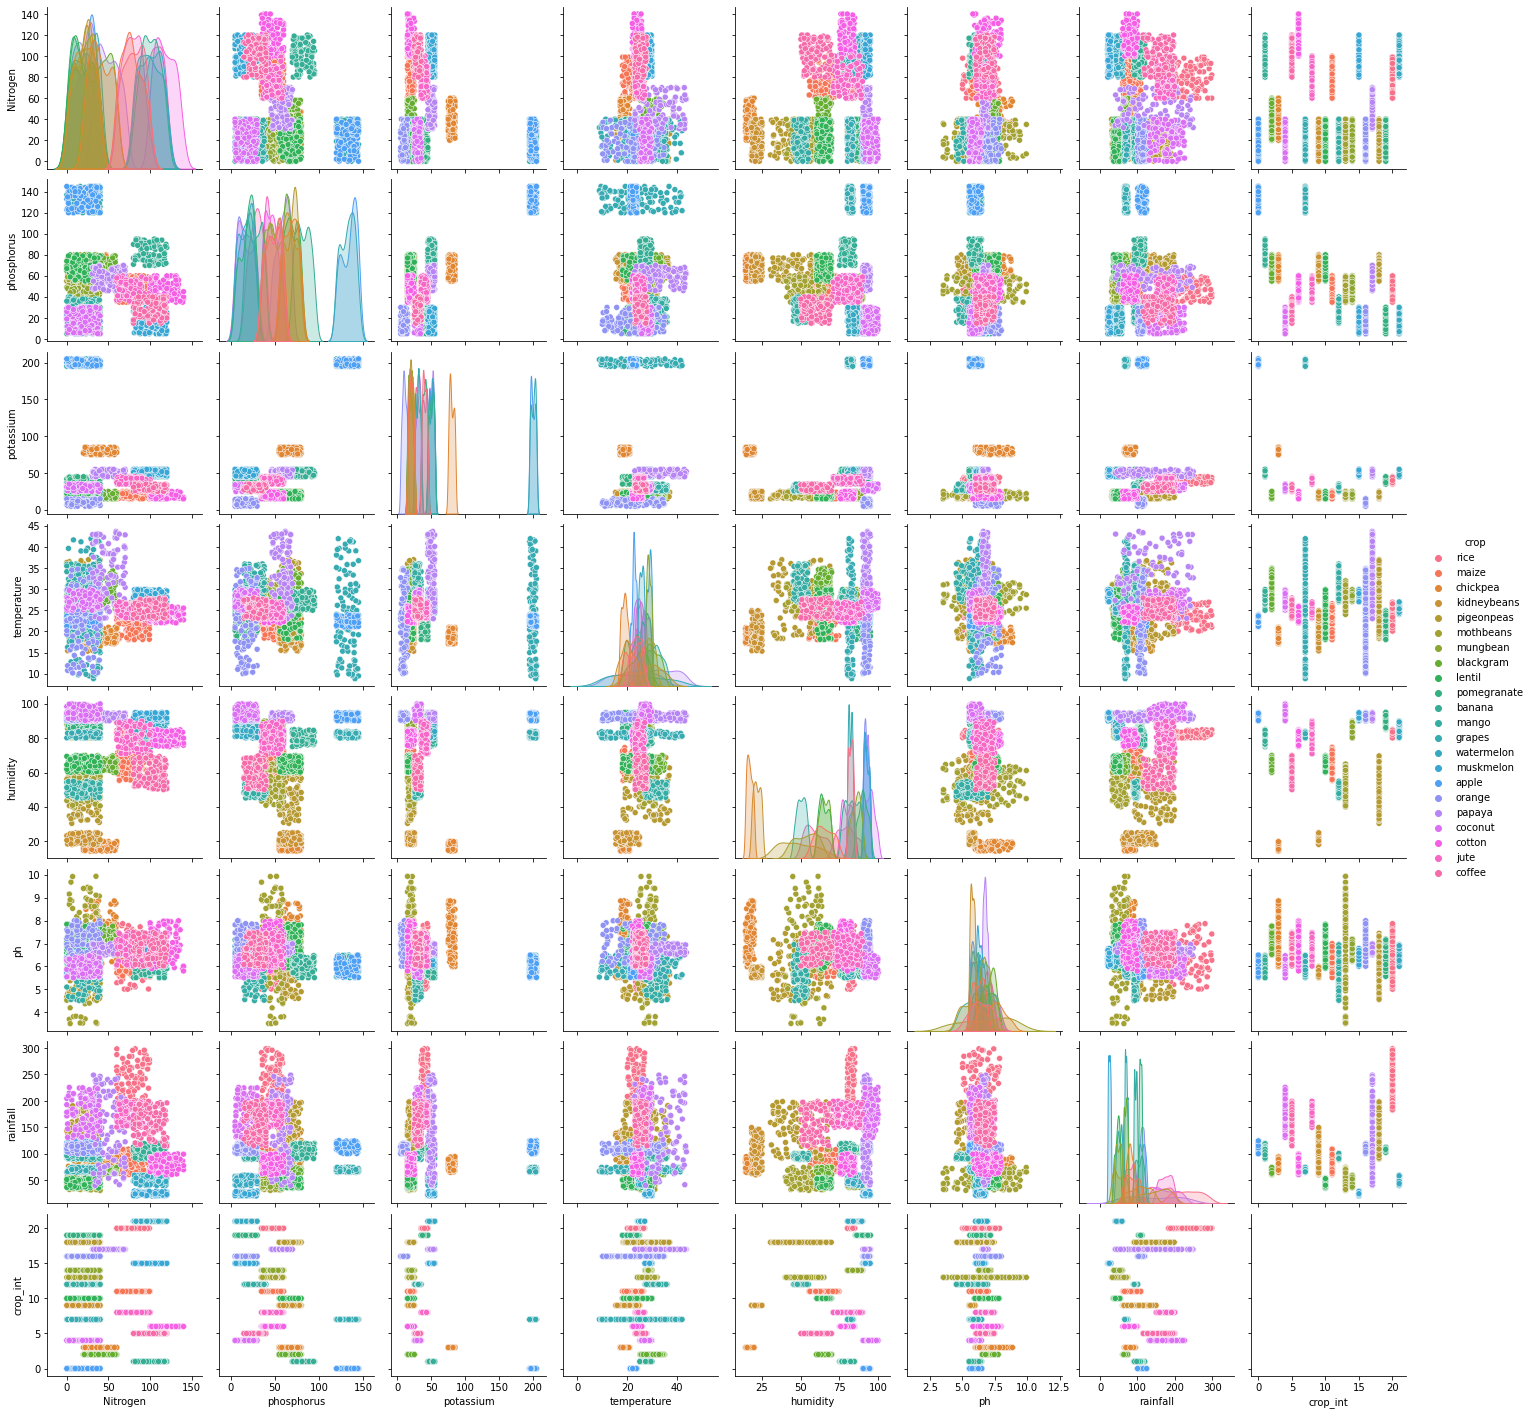

In [99]:
#Interação entre os atributos preditivos
sns.pairplot(df, hue='crop')

# 5. Modelos de Aprendizado Supervisionado (Classificação)

In [61]:
X = df.drop(["crop", "crop_int"], axis=1)
y = df["crop_int"]

In [62]:
# Separando em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42, stratify = y)

In [63]:
# Normalização dos dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

minmax = MinMaxScaler()
X_train_MinMax = minmax.fit_transform(X_train)
X_test_MinMax = minmax.transform(X_test)

## 5.1. Modelos baseados em distância

### 5.1.1. K-Nearest Neighbors

In [64]:
# Inicializando Classificador kNN
knn = KNeighborsClassifier()

# Hiper-parâmetros do kNN
params_knn = {
    "n_neighbors": tuple(range(1, 31)),
    "p": tuple(range(1, 6))
}

In [65]:
# Cross-validation Holdout
knn_holdout = GridSearchCV(estimator=knn, param_grid=params_knn, cv=StratifiedShuffleSplit(1, test_size=.2))

# Treinando modelo
knn_holdout.fit(X_train_MinMax, y_train)

print(f'Os melhores parâmetros para o kNN com o Holdout foram: {knn_holdout.best_params_}')

# Predizendo conjunto de teste
y_prediction = knn_holdout.predict(X_test_MinMax)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o kNN com o Holdout foram: {'n_neighbors': 3, 'p': 1}
Precision: 0.9763108363794862
Recall: 0.975
F1 Score:  0.9750192185738652
Accuracy: 0.975


In [66]:
# Cross-Validation K-Fold
knn_kfold = GridSearchCV(estimator=knn, param_grid=params_knn, cv=5)

# Treinando modelo
knn_kfold.fit(X_train_MinMax, y_train)

print(f'Os melhores parâmetros para o kNN com o 5-fold foram: {knn_kfold.best_params_}')

# Predizendo conjunto de teste
y_prediction = knn_kfold.predict(X_test_MinMax)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o kNN com o 5-fold foram: {'n_neighbors': 3, 'p': 1}
Precision: 0.9763108363794862
Recall: 0.975
F1 Score:  0.9750192185738652
Accuracy: 0.975


In [67]:
# Cross-Validation Leave-One-Out
knn_loo = GridSearchCV(estimator=knn, param_grid=params_knn, cv=LeaveOneOut(), n_jobs=-1)

# Treinando modelo
knn_loo.fit(X_train_MinMax, y_train)

print(f'Os melhores parâmetros para o kNN com o Leave-One-Out foram: {knn_loo.best_params_}')

# Predizendo conjunto de teste
y_prediction = knn_loo.predict(X_test_MinMax)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o kNN com o Leave-One-Out foram: {'n_neighbors': 5, 'p': 1}
Precision: 0.983077528532074
Recall: 0.9818181818181817
F1 Score:  0.9817283700467269
Accuracy: 0.9818181818181818


No que concerne a validação cruzada, os resultados foram divergentes para os diferentes métodos implementados. Apesar de o *holdout* e o *leave-one-out* obterem valores semelhantes para as métricas de avaliação, a maior diferença entre eles é o tempo de execução. O segundo requer um poder computacional muito maior, por se tratar de uma técnica que testa o modelo encontrado para todas as observações, apesar de ser tecnicamente melhor que o *holdout* por não apresentar viés. Dessa forma, deve-se optar pela técnica que melhor se aplicar aos requisitos de implementação, no que tange ao tempo de execução esperado e custo computacional.

No mais, os valores de $k$ para cada técnica de particionamento dos dados foi diferente, bem como o cálculo da distância para o *holdout*. Como o Grid Search foi aplicado de forma a maximizar a acurácia e todas as outras métricas apresentaram valores altos, a escolha do modelo pode ser arbitrária.

### 5.1.2. KD-tree

In [68]:
# Inicializando Classificador KD-tree
kdtree = KNeighborsClassifier(algorithm='kd_tree')

# Hiper-parâmetros do kNN
params_kdtree = {
    "n_neighbors": tuple(range(1, 31)),
    "p": tuple(range(1, 6))
}

In [69]:
# Cross-validation Holdout
kdtree_holdout = GridSearchCV(estimator=knn, param_grid=params_knn, cv=StratifiedShuffleSplit(1, test_size=.2))

# Treinando modelo
kdtree_holdout.fit(X_train_MinMax, y_train)

print(f'Os melhores parâmetros para o kdtree com o Holdout foram: {kdtree_holdout.best_params_}')

# Predizendo conjunto de teste
y_prediction = kdtree_holdout.predict(X_test_MinMax)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o kdtree com o Holdout foram: {'n_neighbors': 3, 'p': 1}
Precision: 0.9763108363794862
Recall: 0.975
F1 Score:  0.9750192185738652
Accuracy: 0.975


In [70]:
# Cross-Validation K-Fold
kdtree_kfold = GridSearchCV(estimator=kdtree, param_grid=params_kdtree, cv=5)

# Treinando modelo
kdtree_kfold.fit(X_train_MinMax, y_train)

print(f'Os melhores parâmetros para o kdtree com o 5-fold foram: {kdtree_kfold.best_params_}')

# Predizendo conjunto de teste
y_prediction = kdtree_kfold.predict(X_test_MinMax)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o kdtree com o 5-fold foram: {'n_neighbors': 3, 'p': 1}
Precision: 0.9763108363794862
Recall: 0.975
F1 Score:  0.9750192185738652
Accuracy: 0.975


O algoritmo KD-tree encontra os mesmos resultados que o Knn, tanto em resultados, quanto à decisão do modelo ideal para os dados. Para os dados aqui apresentados o tempo de classificação e treinamento são equivalentes, porém a literatura favorece o kdtree para bases de dados grandes, considerando que ele usa busca binária para encontrar os vizinhos mais próximos, e dessa forma possui complexidade algorítmica menor.

## 5.2. Modelos baseados em procura

### 5.2.1. Árvore de Decisão

In [71]:
# Inicializando Classificador Decision Tree
decision_tree = DecisionTreeClassifier(random_state=50)

# Hiper-parâmetros do Decision tree
params_dt = {
    "max_depth": range(5, 21), 
    "criterion": ["gini", "log_loss", "entropy"]
}

In [72]:
# Decision Tree Cross-validation Holdout
dt_holdout = GridSearchCV(estimator=decision_tree, param_grid=params_dt, cv=StratifiedShuffleSplit(1, test_size=.2))

# Treinando modelo
dt_holdout.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o Decision Tree com o Holdout foram: {dt_holdout.best_params_}')

# Predizendo conjunto de teste
y_prediction = dt_holdout.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o Decision Tree com o Holdout foram: {'criterion': 'gini', 'max_depth': 11}
Precision: 0.9792147904796125
Recall: 0.9772727272727273
F1 Score:  0.9771118548770279
Accuracy: 0.9772727272727273


In [73]:
# Decision Tree Cross-validation K-Fold
dt_kfold = GridSearchCV(estimator=decision_tree, param_grid=params_dt, cv=5)

# Treinando modelo
dt_kfold.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o Decision Tree com o 5-fold foram: {dt_kfold.best_params_}')

# Predizendo conjunto de teste
y_prediction = dt_kfold.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o Decision Tree com o 5-fold foram: {'criterion': 'gini', 'max_depth': 13}
Precision: 0.9829791420700512
Recall: 0.9818181818181817
F1 Score:  0.9816944573042133
Accuracy: 0.9818181818181818


Ao utilizar as diferentes técnicas de particionamento, percebe-se uma divergência entre os resultados das métricas de avaliação. Mais uma vez, o Grid Search foi aplicado a fim de maximizar a acurácia, e em ambos os modelos tal métrica possui resultados semelhantes. O modelo encontrado pelo algoritmo Kfold teve uma taxa de acerto maior na base de teste, porém dada a escala diminuta da diferença entre ambos, qualquer um dos dois seria adequedo.

### 5.2.2. Random Forest

In [74]:
# Inicializando Random Forest Classifier
random_forest = RandomForestClassifier(random_state=50)

# Hiper-parâmetros do Random Forest
params_rf = {
    "max_depth": range(5, 21)
}

In [75]:
# Random Forest Cross-validation Holdout
rf_holdout = GridSearchCV(estimator=random_forest, param_grid=params_rf, cv=StratifiedShuffleSplit(1, test_size=.2))

# Treinando modelo
rf_holdout.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o Random Forest com o Holdout foram: {rf_holdout.best_params_}')

# Predizendo conjunto de teste
y_prediction = rf_holdout.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o Random Forest com o Holdout foram: {'max_depth': 5}
Precision: 0.9785517512790242
Recall: 0.9704545454545456
F1 Score:  0.968926580479854
Accuracy: 0.9704545454545455


In [76]:
# Random Forest Cross-validation K-Fold
rf_kfold = GridSearchCV(estimator=random_forest, param_grid=params_rf, cv=5)

# Treinando modelo
rf_kfold.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o Random Forest com o 5-fold foram: {rf_kfold.best_params_}')

# Predizendo conjunto de teste
y_prediction = rf_kfold.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o Random Forest com o 5-fold foram: {'max_depth': 14}
Precision: 0.9935064935064936
Recall: 0.993181818181818
F1 Score:  0.9931775541531639
Accuracy: 0.9931818181818182


Neste caso, as técnicas de validação cruzada resultaram em modelos diferentes, mas com métricas de avaliação similares. Dessa forma, é possível inferir que o melhor modelo seria aquele treinado com o *holdout*, já que são necessárias menos etapas para predizer uma nova observação, uma vez que a sua profundidade é menor comparada a do modelo que utilizou o K-Fold.

## 5.3. Modelos Conexionistas/otimização

### 5.3.1. Multi-Layer Perceptron

In [77]:
# Inicializando MLP Classifier
mlp = MLPClassifier(random_state=50)

# Hiper-parâmetros do MLP
params_mlp = {
    "hidden_layer_sizes": [[], [5], [10], [5, 5], [10, 10], [15,15], [20, 20], [50,50], [100,100]]
}

In [78]:
# MLP Cross-validation Holdout
mlp_holdout = GridSearchCV(estimator=mlp, param_grid=params_mlp, cv=StratifiedShuffleSplit(1, test_size=.2))

# Treinando modelo
mlp_holdout.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o MLP com o Holdout foram: {mlp_holdout.best_params_}')

# Predizendo conjunto de teste
y_prediction = mlp_holdout.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E

Os melhores parâmetros para o MLP com o Holdout foram: {'hidden_layer_sizes': [50, 50]}
Precision: 0.991538764266037
Recall: 0.9909090909090907
F1 Score:  0.9908948561066659
Accuracy: 0.990909090909091


C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
# MLP Cross-validation K-Fold
mlp_kfold = GridSearchCV(estimator=mlp, param_grid=params_mlp, cv=5)

# Treinando modelo
mlp_kfold.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o MLP com o 5-fold foram: {mlp_kfold.best_params_}')

# Predizendo conjunto de teste
y_prediction = mlp_kfold.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E

Os melhores parâmetros para o MLP com o 5-fold foram: {'hidden_layer_sizes': [50, 50]}
Precision: 0.991538764266037
Recall: 0.9909090909090907
F1 Score:  0.9908948561066659
Accuracy: 0.990909090909091


C:\Users\Eduardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As redes neurais artificiais com ambas as estratégias de validação se adaptaram melhor para a arquitetura com duas camadas de 50 neurônios dentre as configurações testadas, indicando que redes menores não capturam toda a informação para discriminar os dados, e que redes maiores sofrem ao decorar os dados e assim perdem capacidade de aprendizado. No que tange às técnicas de particionamento, é possível perceber que não houve alteração significativa nos resultados das medidas de desempenho, o que implica que o modelo escolhido por ambas as técnicas é adequado.

### 5.3.2. Support Vector Machine

In [80]:
# Inicializando SVM
svm = SVC()

# Hiper-parâmetros da SVM
params_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [81]:
# MLP Cross-validation Holdout
svm_holdout = GridSearchCV(estimator=svm, param_grid=params_svm, cv=StratifiedShuffleSplit(1, test_size=.2))

# Treinando modelo
svm_holdout.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o MLP com o Holdout foram: {svm_holdout.best_params_}')

# Predizendo conjunto de teste
y_prediction = svm_holdout.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o MLP com o Holdout foram: {'kernel': 'linear'}
Precision: 0.9837465564738291
Recall: 0.9818181818181819
F1 Score:  0.981714962336972
Accuracy: 0.9818181818181818


In [82]:
# MLP Cross-validation Holdout
svm_kfold = GridSearchCV(estimator=svm, param_grid=params_svm, cv=5)

# Treinando modelo
svm_kfold.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o MLP com o Kfold foram: {svm_kfold.best_params_}')

# Predizendo conjunto de teste
y_prediction = svm_kfold.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o MLP com o Kfold foram: {'kernel': 'linear'}
Precision: 0.9837465564738291
Recall: 0.9818181818181819
F1 Score:  0.981714962336972
Accuracy: 0.9818181818181818


Assim como no caso do MLP, o modelo escolhido foi o mesmo para as métricas de avaliação cruzada. Algo importante a ser mencionado é que os modelos escolheram o *kernel* linear para a máquina de vetores de suporte. Tal resultado é esperado, visto que a partir da visualização dos dados é possível perceber que eles são linearmente discrimináveis. 

## 5.4. Modelos probabilísticos

### 5.4.1 Naive Bayes

In [83]:
# Inicializando o Naive Bayes
nb = GaussianNB()

# Determinando os parâmetros do Grid Search
# https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
params_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

In [84]:
# Naive Bayes Cross-validation Holdout
nb_holdout = GridSearchCV(estimator=nb, param_grid=params_nb, cv=5)

# Treinando modelo
nb_holdout.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o Naive Bayes com o Holdout foram: {nb_holdout.best_params_}')

# Predizendo conjunto de teste
y_prediction = nb_holdout.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o Naive Bayes com o Holdout foram: {'var_smoothing': 0.0005336699231206307}
Precision: 0.9958677685950413
Recall: 0.9954545454545454
F1 Score:  0.9954431533378901
Accuracy: 0.9954545454545455


In [85]:
# Naive Bayes Cross-validation K-Fold
nb_kfold = GridSearchCV(estimator=nb, param_grid=params_nb, cv=5)

# Treinando modelo
nb_kfold.fit(X_train_norm, y_train)

print(f'Os melhores parâmetros para o Naive Bayes com o 5-fold foram: {nb_kfold.best_params_}')

# Predizendo conjunto de teste
y_prediction = nb_kfold.predict(X_test_norm)

# Calculando métricas para avaliação
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average=None)
recall = recall_score(y_test, y_prediction, average=None)
f1 = f1_score(y_test, y_prediction, average=None)

print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score: ", np.mean(f1))
print("Accuracy:", np.mean(accuracy))

Os melhores parâmetros para o Naive Bayes com o 5-fold foram: {'var_smoothing': 0.0005336699231206307}
Precision: 0.9958677685950413
Recall: 0.9954545454545454
F1 Score:  0.9954431533378901
Accuracy: 0.9954545454545455


Em se tratando do Naive Bayes, ambas as técnicas de validação cruzada resultaram no mesmo modelo, com o hiperparâmetro *var_smoothing* apresentando o mesmo valor, bem como os métricas de avaliação. Vale mencionar que dentre os algoritmos implementados este foi o que obteve os melhores resultados, mesmo sendo considerado um classificador simples. Apesar de haver a suposição de independência entre as variáveis, o que poderia ser um problema, foi constatado em análises anteriores que os atributos observados possuem baixa correlação, o que indica um cenário ideal para o emprego deste algoritmo classificador.

### 5.4.2 Redes bayesianas

# 6. Modelos de Aprendizado Não-Supervisionado (Descrição)

## 6.1. Modelos de Agrupamento

### 6.1.1. K-means

In [94]:
X.head(3)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248


In [88]:
normalizador = StandardScaler()
X_norm = normalizador.fit_transform(X)

In [95]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_norm)

KMeans(n_clusters=2, random_state=42)

In [98]:
X['Group'] = kmeans.labels_
X.head(3)

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Label_Kmeans
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0


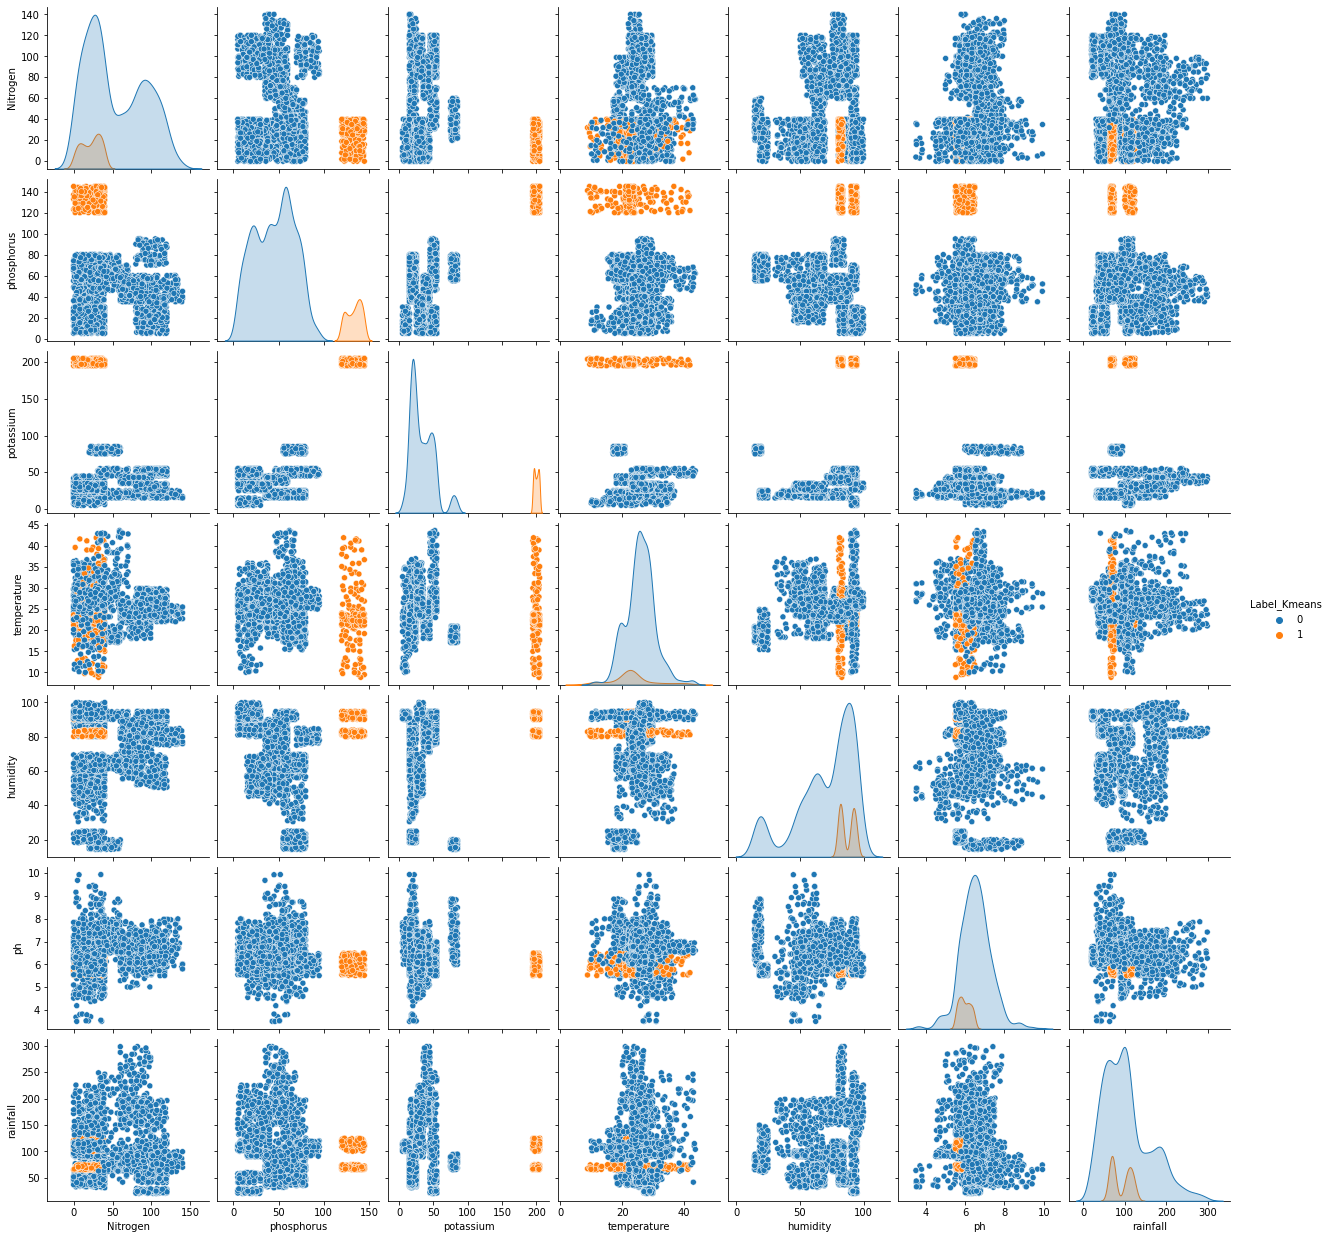

In [100]:
sns.pairplot(X, hue='Group')

O Algoritmo Kmeans divide bem os dados em em relação a alguns dos pares de atributos, porém cria distinções aparentemente arbitrárias quanto aos outros pares, é difícil visualizar os agrupamentos pois os dados possuem mais de 3 dimensões, vamos analisar os dados com apenas 2 componentes principais a fim de facilitar o entendimento.

In [107]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X.iloc[:,:-1]))
X_pca['Group'] = kmeans.labels_

In [109]:
pca.explained_variance_ratio_

array([0.4012914 , 0.34270576])

As 2 componentes que serão analisadas em seguida descrevem cerca de 75% da variância dos dados

<AxesSubplot: xlabel='0', ylabel='1'>

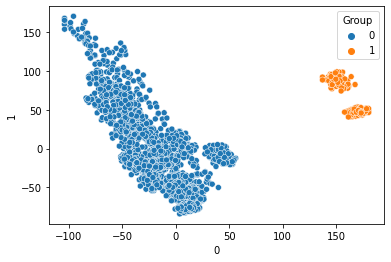

In [108]:
sns.scatterplot(X_pca, x = 0, y = 1, hue='Group')

Visualizando os dados em apenas 2 coordenadas podemos ver que o kmeans encontra uma separação satisfatória para os dados, que não era óbvia de se vizualizar quando analisados apenas os pares de atributos.

### 6.1.2. DB-SCAN

## 6.2. Modelos de Regras de Associação

### 6.2.1. Apriori

### 6.2.2. FP-Growth

# 7. Conclusões preliminares

Em suma, todos os modelos implementados obtiveram bons resultados nas mais diversas métricas de avaliação, sendo que o menos eficiente deles foi o KNN e os mais eficientes Naive Bayes e Multilayer Perceptron. Tais resultados eram esperados, visto que os dados são balanceados e podem ser separados com relativa facilidade. No que tange às diferentes técnicas de particionamento, é possível perceber que o KNN foi o método que obteve maior diferença nos testes, enquanto que para os outros os resultados mantiveram-se semelhantes.

Nesse cenário, a escolha do melhor modelo deve ser pautada pela disponibilidade de recursos e tempo. O MLP apresenta um custo computacional ligeiramente alto, levando um tempo maior para ser treinado, o que não pode ser o ideal em diversas situações. Dessa maneira, o Naive Bayes torna-se a alternativa mais viável, tendo em vista que suas métricas de avaliação apresentaram os melhores resultados e seu custo computacional é menor.

# 8. Referências Bibliográficas

* SISTEMA DE PRODUÇÃO DE MELÃO. [S. l.]: Embrapa Semiárido, ISSN 1807-0027. Mensal. Disponível em: http://www.cpatsa.embrapa.br:8080/sistema_producao/spmelao/manejo_do_solo.html. Acesso em: 1 maio 2023;

* SOUSA, Rafaela. Rotação de culturas. [S. l.]: Brasil Escola. Disponível em: https://brasilescola.uol.com.br/geografia/rotacao-culturas.htm. Acesso em: 1 maio 2023.

In [48]:
!jupyter nbconvert --to webpdf --allow-chromium-download "Análise de Culturas.ipynb"

[NbConvertApp] Converting notebook Análise de Culturas.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2577448 bytes to Análise de Culturas.pdf
